In [1]:
import json
import os.path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Road annotations

In [2]:
road_root = "../data/datasets/road"

In [3]:
with open(f"{road_root}/road_trainval_v1.0.json") as f:
    road_annots = json.load(f)

The first level of `road_trainval_v1.0.json` contains dataset level information like classes of each label type:

- Here are all the fields: `dict_keys(['all_input_labels', 'all_av_action_labels', 'av_action_labels', 'agent_labels', 'action_labels', 'duplex_labels', 'triplet_labels', 'loc_labels', 'db', 'label_types', 'all_duplex_labels', 'all_triplet_labels', 'all_agent_labels', 'all_loc_labels', 'all_action_labels', 'duplex_childs', 'triplet_childs'])`
- `all_input_labels`: All classes used to annotate the dataset
- `label_types` :  It is list of all the label types `['agent', 'action', 'loc', 'duplex', 'triplet']`.
- `all_av_action_labels`: All classes used to annotate AV actions
- `av_action_labels`: Classes finally being used for AV actions
-  Remaining fields ending with `labels` follows the same logic and AV actions described in above line.
- `duplex_childs` and `triplet_childs` contain ids of child classes form `agent`, `action` or `location` labels to construct `duplex` or `triplet` labels,
- `duplex` is constructed using `agent` and `action` classes.
- `event` or `triplet` is constructed  using `agent`, `action`, and `location` classes.

Finally, the `db` field contains all `frame` and `tube` level annotations for all the videos

In [4]:
agents = road_annots['all_agent_labels']
print(f"Available Agent labels: {agents}")

Available Agent labels: ['Ped', 'Car', 'Cyc', 'Mobike', 'SmalVeh', 'MedVeh', 'LarVeh', 'Bus', 'EmVeh', 'TL', 'OthTL']


- To access annotation for a vides, use db['2014-06-25-16-45-34_stereo_centre_02'], where `'2014-06-25-16-45-34_stereo_centre_02'` is name of a video.
- Each video annotation comes with following fields
    - `['split_ids', 'agent_tubes', 'action_tubes', 'loc_tubes', 'duplex_tubes', 'triplet_tubes', 'av_action_tubes', 'frame_labels', 'frames', 'numf']`
    - `split_ids` contains the split id assigned this videos out of `'test', 'train_1','val_1',........'val_3'`.
    - `numf` is number of frames in the video.
    - `frame_labels` is AV-action class ids assigned for each frame of the videos.
    - `frames` contains frame-level annotations
        - for the each frame of the video, e.g. for `'1'` frame, frames['1'] contains `['annotated', 'rgb_image_id', 'width', 'height', 'av_action_ids', 'annos', 'input_image_id']`
        - `annotated` is flag to indicate if frame is annotated or not.
        - `rgb_image_id` = `input_image_id` is id of physical frame extracted by ffmpeg.
        - `av_action_ids`: AV action labels
        - `annos` : contains annotations of a frame with bounding boxes with unique keys like `annos['4585'] =['b19111',]` from a frame number `'4585'`, which is unique in whole dataset.
        - `annos['b09']` has following keys `dict_keys(['box', 'agent_ids', 'loc_ids', 'action_ids', 'duplex_ids', 'triplet_ids', 'tube_uid'])`
            - `box` is normalized (0,1) bounding box coordinate with `xmin, ymin, xmax, ymax`
            - `tube_uid` id of the agent tube it belongs.
            - fields ending with `_ids` contains class ids of respective label type.
    - The fields ending `tubes` contains tube-level annotation of respective label-type.
        - for example, `db['2014-06-25-16-45-34_stereo_centre_02']['agent_tubes']` contains tubes with fields like `['544e13cc-001-01', 'a074d1bf-001-01', 'e97b3e4c-001-01', 'edb6d66a-005-01', .........]`
        - each tube has following fields `dict_keys(['label_id', 'annos'])`
            - `label_id` is class id from respective label type.
            - `annos` is dictinary with keys made of frame_ids, e.g. `['agent_tubes']['10284a58-002-01']['annos'].keys()` >> `dict_keys(['4585', '4586', ......, '4629', '4630'])`
            - `annos['4585'] = 'b19111'` stores unique key which points to frame-level annotations in frame number '4585'.


In [5]:
frame_annotations = road_annots['db']
print(frame_annotations.keys())
print(len(frame_annotations.keys()))

dict_keys(['2014-06-25-16-45-34_stereo_centre_02', '2014-06-26-09-53-12_stereo_centre_02', '2014-07-14-14-49-50_stereo_centre_01', '2014-07-14-15-42-55_stereo_centre_03', '2014-08-08-13-15-11_stereo_centre_01', '2014-08-11-10-59-18_stereo_centre_02', '2014-11-14-16-34-33_stereo_centre_06', '2014-11-18-13-20-12_stereo_centre_05', '2014-11-21-16-07-03_stereo_centre_01', '2014-11-25-09-18-32_stereo_centre_04', '2014-12-09-13-21-02_stereo_centre_01', '2015-02-03-08-45-10_stereo_centre_02', '2015-02-03-19-43-11_stereo_centre_04', '2015-02-06-13-57-16_stereo_centre_02', '2015-02-13-09-16-26_stereo_centre_02', '2015-02-13-09-16-26_stereo_centre_05', '2015-02-24-12-32-19_stereo_centre_04', '2015-03-03-11-31-36_stereo_centre_01'])
18


In [6]:
test_frame = frame_annotations['2014-06-25-16-45-34_stereo_centre_02']['frames']['1']
print(f"Frame annotation: {test_frame}")

Frame annotation: {'annotated': 1, 'rgb_image_id': 1, 'width': 1280, 'height': 960, 'av_action_ids': [1], 'annos': {'b01': {'box': [0.49769053117782913, 0.40846153846153843, 0.5348201977190377, 0.47486849911014434], 'agent_ids': [6], 'loc_ids': [0], 'action_ids': [8, 11], 'duplex_ids': [91, 94], 'triplet_ids': [1092, 1128], 'tube_uid': '8258d065'}, 'b02': {'box': [0.528591925544685, 0.44310658493177774, 0.540698263555602, 0.48538461538461536], 'agent_ids': [2], 'loc_ids': [0], 'action_ids': [3], 'duplex_ids': [25], 'triplet_ids': [300], 'tube_uid': 'c2b85678'}}, 'input_image_id': 1}


In [7]:
test_frame_df = pd.DataFrame.from_dict(test_frame['annos'])
print(test_frame_df)

                                                           b01  \
box          [0.49769053117782913, 0.40846153846153843, 0.5...   
agent_ids                                                  [6]   
loc_ids                                                    [0]   
action_ids                                             [8, 11]   
duplex_ids                                            [91, 94]   
triplet_ids                                       [1092, 1128]   
tube_uid                                              8258d065   

                                                           b02  
box          [0.528591925544685, 0.44310658493177774, 0.540...  
agent_ids                                                  [2]  
loc_ids                                                    [0]  
action_ids                                                 [3]  
duplex_ids                                                [25]  
triplet_ids                                              [300]  
tube_uid        

In [8]:
print(f"Number of frames in video: {len(frame_annotations['2014-06-25-16-45-34_stereo_centre_02']['frames'].keys())}")

Number of frames in video: 4734


In [9]:
for frame in frame_annotations['2014-06-25-16-45-34_stereo_centre_02'].get('frames'):
    print(frame)
    break
print(f"Number of annotated frames in video: {len([frame for frame in frame_annotations['2014-06-25-16-45-34_stereo_centre_02']['frames'] if frame_annotations['2014-06-25-16-45-34_stereo_centre_02']['frames'][frame]['annotated']])}")

1
Number of annotated frames in video: 4734


## Plot number of annotated frames over number of frames in the video

['video_0', 'video_1', 'video_2', 'video_3', 'video_4', 'video_5', 'video_6', 'video_7', 'video_8', 'video_9', 'video_10', 'video_11', 'video_12', 'video_13', 'video_14', 'video_15', 'video_16', 'video_17']
[4734 6000 6001 6000 6001 1168 6000 6000 6001 6000 6001 6000 6000 6000
 6000 6000 6000 6001]
[4734 5999 5980 6000 6001 1168 6000 5976 6001 5930 6001 6000 6000 6000
 6000 6000 6000 5990]


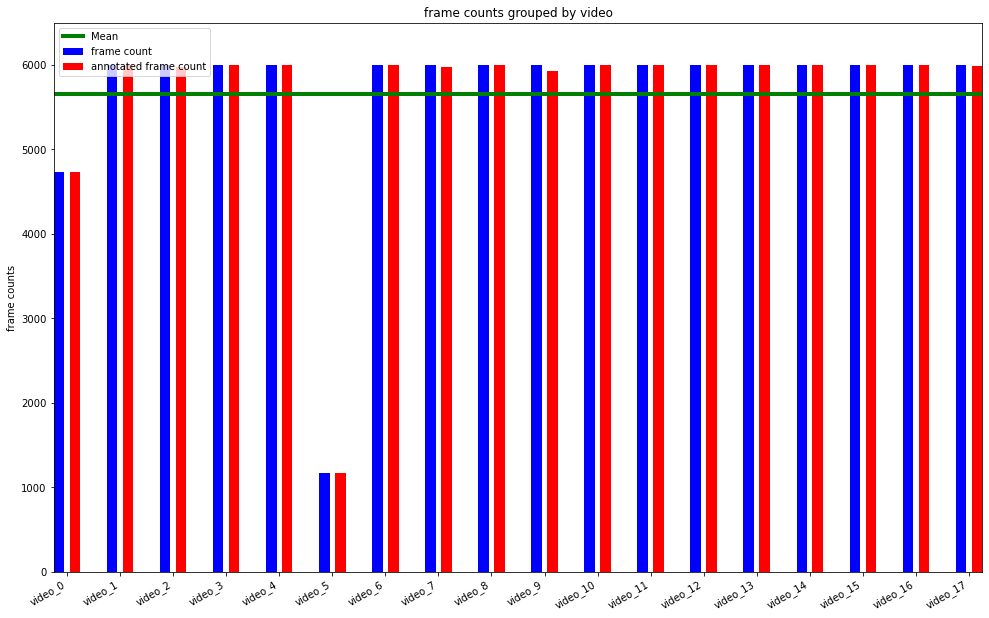

In [6]:
videos = [ f"video_{count}" for count in np.arange(len(frame_annotations.keys()))]
x = np.arange(len(videos))
print(videos)
frame_counts = np.array([len(frame_annotations[video]['frames'].keys()) for video in frame_annotations])
print(frame_counts)
annotated_frame_counts = np.array([len([frame for frame in frame_annotations[video]['frames'] if frame_annotations[video]['frames'][frame]['annotated']]) for video in frame_annotations])
print(annotated_frame_counts)
width = 0.3

fig, ax = plt.subplots(figsize=(14,10))
ax.bar(x-width/2, frame_counts, width=0.2, color='b', align='center', label='frame count')
ax.bar(x+width/2, annotated_frame_counts, width=0.2, color='r', align='center', label='annotated frame count')
ax.axhline(y=frame_counts.mean(), linewidth=4, color='g', label='Mean')

ax.set_ylabel('frame counts')
ax.set_title('frame counts grouped by video')
ax.set_xticks(x, videos)
ax.legend()

ax.autoscale(tight=True)
fig.tight_layout()
fig.autofmt_xdate()

plt.ylim((0, 6500))
plt.show()

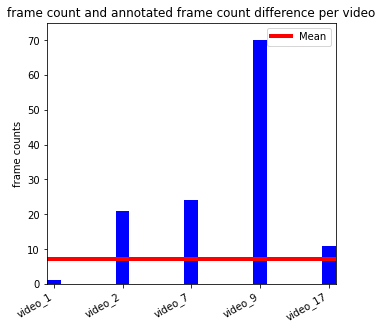

In [7]:
difs =np.subtract(np.array(frame_counts), np.array(annotated_frame_counts))
videos_with_dif = [video for i, video in enumerate(videos) if difs[i] > 0]
x = np.arange(len(videos_with_dif))

fig, ax = plt.subplots(figsize=(5,5))
ax.bar(x, difs[difs > 0], width=0.2, color='b', align='center')
ax.axhline(y=difs.mean(), linewidth=4, color='r', label='Mean')

ax.set_ylabel('frame counts')
ax.set_title('frame count and annotated frame count difference per video')
ax.set_xticks(x, videos_with_dif)

ax.autoscale(tight=True)
ax.legend()
fig.tight_layout()
fig.autofmt_xdate()

plt.ylim((0, 75))
plt.show()

## Instance Counts


# Converting to Yolo Format

In [12]:
print(f"Frame annotation: {test_frame}")
print(f"{test_frame['rgb_image_id']:05d}")

Frame annotation: {'annotated': 1, 'rgb_image_id': 1, 'width': 1280, 'height': 960, 'av_action_ids': [1], 'annos': {'b01': {'box': [0.49769053117782913, 0.40846153846153843, 0.5348201977190377, 0.47486849911014434], 'agent_ids': [6], 'loc_ids': [0], 'action_ids': [8, 11], 'duplex_ids': [91, 94], 'triplet_ids': [1092, 1128], 'tube_uid': '8258d065'}, 'b02': {'box': [0.528591925544685, 0.44310658493177774, 0.540698263555602, 0.48538461538461536], 'agent_ids': [2], 'loc_ids': [0], 'action_ids': [3], 'duplex_ids': [25], 'triplet_ids': [300], 'tube_uid': 'c2b85678'}}, 'input_image_id': 1}
00001


Clean up all the data we don't need for our use case

In [8]:
# path, image_width, image_height, xmin, ymin, xmax, ymax, classId
frame_annotations_cleaned = []
for video in frame_annotations:
    for frame in frame_annotations[video]['frames']:
        frame_data = frame_annotations[video]['frames'][frame]
        if frame_data['annotated']:
            for annotation in frame_data['annos']:
                object_annotation = frame_data['annos'][annotation]
                frame_annotations_cleaned.append(
                    [
                        f"{video}/{int(frame):05d}.jpg",
                        frame_data['width'],
                        frame_data['height'],
                        object_annotation['box'][0],
                        object_annotation['box'][1],
                        object_annotation['box'][2],
                        object_annotation['box'][3],
                        object_annotation['agent_ids'][0]
                    ]
                )

gt_df = pd.DataFrame(frame_annotations_cleaned, columns=['path', 'image_width', 'image_height', 'xmin', 'ymin', 'xmax', 'ymax', 'classId'])
print(gt_df)

                                                  path  image_width  \
0       2014-06-25-16-45-34_stereo_centre_02/00001.jpg         1280   
1       2014-06-25-16-45-34_stereo_centre_02/00001.jpg         1280   
2       2014-06-25-16-45-34_stereo_centre_02/00002.jpg         1280   
3       2014-06-25-16-45-34_stereo_centre_02/00002.jpg         1280   
4       2014-06-25-16-45-34_stereo_centre_02/00003.jpg         1280   
...                                                ...          ...   
476672  2015-03-03-11-31-36_stereo_centre_01/05999.jpg         1280   
476673  2015-03-03-11-31-36_stereo_centre_01/06000.jpg         1280   
476674  2015-03-03-11-31-36_stereo_centre_01/06000.jpg         1280   
476675  2015-03-03-11-31-36_stereo_centre_01/06001.jpg         1280   
476676  2015-03-03-11-31-36_stereo_centre_01/06001.jpg         1280   

        image_height      xmin      ymin      xmax      ymax  classId  
0                960  0.497691  0.408462  0.534820  0.474868        6  
1  

In [21]:
road_all_frames = []
for video in frame_annotations:
    road_all_frames += [f"{video}/{int(frame):05d}.jpg" for frame in frame_annotations[video]['frames']]

road_all_frames = np.array(road_all_frames)
print(road_all_frames.shape)


(101907,)


In [23]:
import os
ok = True
for entry in road_all_frames:
    if not os.path.isfile(f"{road_root}/rgb-images/{entry}"):
        ok = False
        print(f"file {entry} does not exist")

print(f"Dataframe: road_all_frames is ok: {ok}")

Dataframe: road_all_frames is ok: True


In [24]:
road_all_frames_df = pd.DataFrame(road_all_frames)
# create train, val & test splits
train, val, test = np.split(road_all_frames_df.sample(frac=1, random_state=42), [int(.6 * len(road_all_frames_df)), int(.8 * len(road_all_frames_df))])  # train: 80%, val: 20%, test: 20%
print(train.shape)
print(val.shape)
print(test.shape)
print(train)

(61144, 1)
(20381, 1)
(20382, 1)
                                                     0
44207   2014-11-21-16-07-03_stereo_centre_01/02304.jpg
8959    2014-06-26-09-53-12_stereo_centre_02/04226.jpg
59282   2014-12-09-13-21-02_stereo_centre_01/05378.jpg
66059   2015-02-03-19-43-11_stereo_centre_04/00154.jpg
91099   2015-02-24-12-32-19_stereo_centre_04/01194.jpg
...                                                ...
100981  2015-03-03-11-31-36_stereo_centre_01/05076.jpg
70391   2015-02-03-19-43-11_stereo_centre_04/04486.jpg
40214   2014-11-18-13-20-12_stereo_centre_05/04311.jpg
58679   2014-12-09-13-21-02_stereo_centre_01/04775.jpg
90018   2015-02-24-12-32-19_stereo_centre_04/00113.jpg

[61144 rows x 1 columns]


In [16]:
from pathlib import Path
def create_nested_folders(*paths):
    for path in paths:
        p = Path(path)
        p.mkdir(parents=True, exist_ok=True)

In [17]:
create_nested_folders(
            f"{road_root}/train/images",
            f"{road_root}/train/labels",
        )

In [23]:
# convert gtsdb csv Labels to YoloFileFormat
# YOLO format:
# one *.txt file per image; The *.txt file specifications are:
# - one row per object
# - each row is [class x_center y_center width height] format
# - Box coordinates must be in normalized xywh format (from 0 - 1). If your boxes are in pixels, divide x_center and width
#   by image width, and y_center and height by image height
# - Class numbers are zero-indexed (start from 0)

# ['path', 'image_width', 'image_height', 'xmin', 'ymin', 'xmax', 'ymax', 'classId']

for image_path in train[0]:
    from shutil import move, copy2
    video, image = image_path.split("/")
    copy2(f"{road_root}/rgb-images/{image_path}", f"{road_root}/train/images/{video}-{image}")
    with open(f"{road_root}/train/labels/{video}-{image[:-4]}.txt", "w+") as f:
        image_df = gt_df.loc[gt_df["path"] == image_path]
        gt_converted = np.array([
            [
                row.loc['classId'],
                (row.loc["xmin"] + row.loc["xmax"]) / 2.0,
                (row.loc["ymin"] + row.loc["ymax"]) / 2.0,
                row.loc["xmax"] - row.loc["xmin"],
                row.loc["ymax"] - row.loc["ymin"]
            ] for index, row in image_df.iterrows()])
        lines = [f"{int(entry[0])} {' '.join(map(str, entry[1:]))}" for entry in gt_converted]
        f.write('\n'.join(lines))
        f.close()
    break

                                                 path  image_width  \
37854  2014-06-26-09-53-12_stereo_centre_02/05352.jpg         1280   
37855  2014-06-26-09-53-12_stereo_centre_02/05352.jpg         1280   
37856  2014-06-26-09-53-12_stereo_centre_02/05352.jpg         1280   
37857  2014-06-26-09-53-12_stereo_centre_02/05352.jpg         1280   

       image_height      xmin      ymin      xmax      ymax  classId  
37854           960  0.721747  0.478311  0.975885  0.640030        1  
37855           960  0.292380  0.441400  0.319777  0.476788        1  
37856           960  0.185360  0.435693  0.208476  0.504186        2  
37857           960  0.336901  0.432268  0.356022  0.463090        5  
False
                                                     0
96319   2014-06-26-09-53-12_stereo_centre_02/05352.jpg
48156   2014-11-14-16-34-33_stereo_centre_06/02676.jpg
33555   2014-07-14-15-42-55_stereo_centre_03/01865.jpg
103284  2014-06-25-16-45-34_stereo_centre_02/05739.jpg
86872   2014-